<a href="https://colab.research.google.com/github/priscilla1812/T2DSure-Smart-Prediction-for-Type-2-Diabetes/blob/main/ML_Model_Comparison_T2D_Prediction_Priscilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Priscilla Philby Oommen

# ***Type 2 Diabetes Prediction using Diabetes Prediction Dataset***

A Comprehensive Dataset for Predicting Diabetes with Medical & Demographic Data

**Inspiration**

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?


**Context:**

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

**Content:**

The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

**Dataset Description:**

**Gender** - the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male,female and other.

**Age** - Age ranges from 0-80 in dataset. diabetes is more commonly diagnosed in older adults.

**Hypertension** - a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don't have hypertension and for 1 it means they have hypertension.

**Heart disease** - a medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don't have heart disease and for 1 it means they have heart disease.

**Smoking history** - It is a risk factor for diabetes and can exacerbate the complications associated with diabetes. There are 5 categories in the dataset i.e not current,former,No Info,current,never and ever.

**Body Mass Index (BMI)** -  measurement of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

**Hemoglobin A1c (HbA1c) level** - measurement of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

**Blood glucose level** - the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

**Diabetes** - the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

In [ ]:
# Import the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/diabetes_prediction_dataset.csv")

# View the top 5 rows of df
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# View the dimensions of df
df.shape

(100000, 9)

## Data Processing

In [ ]:
# View dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# View descriptive statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Checking for null values
# df.isnull().sum().sum() returns the number of missing values in the dataset.
df.isnull().values.any() # returns True when there is at least one missing value occurring in the data.

False

In [ ]:
df.duplicated().sum()

3854

The number of duplicated values is 3854

In [ ]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df = df.drop_duplicates()

In [ ]:
# View the dimensions of df
df.shape

(96146, 9)

In [ ]:
# Checking for values that are 0 in numerical columns of the dataset
print("No. of zero values in Blood Glucose level column : ", df[df['blood_glucose_level']==0].shape[0])
print("No. of zero values in HbA1c level column : ", df[df['HbA1c_level']==0].shape[0])
print("No. of zero values in BMI column : ", df[df['bmi']==0].shape[0])
print("No. of zero values in Age column : ", df[df['age']==0].shape[0])

No. of zero values in Blood Glucose level column :  0
No. of zero values in HbA1c level column :  0
No. of zero values in BMI column :  0
No. of zero values in Age column :  0


**smoking history, gender, hypertension, heart disease, and target variable diabetes are categorical variables**

A categorical variable can be true or false, yes or no, 1 or 0

## EDA

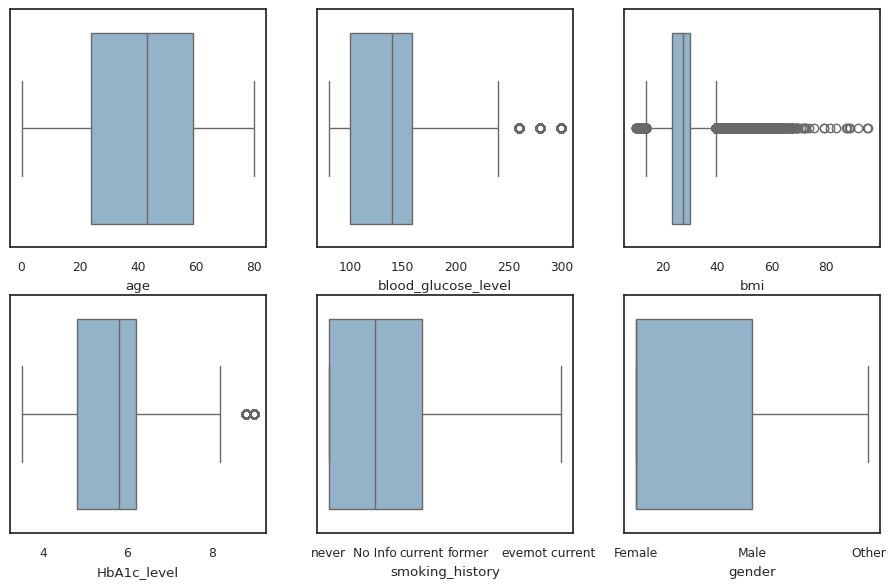

In [ ]:
#Observing Outliers
plt.figure(figsize = (10,10))
for i,col in enumerate(['age', 'blood_glucose_level', 'bmi', 'HbA1c_level', 'smoking_history', 'gender']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = df)
plt.show()

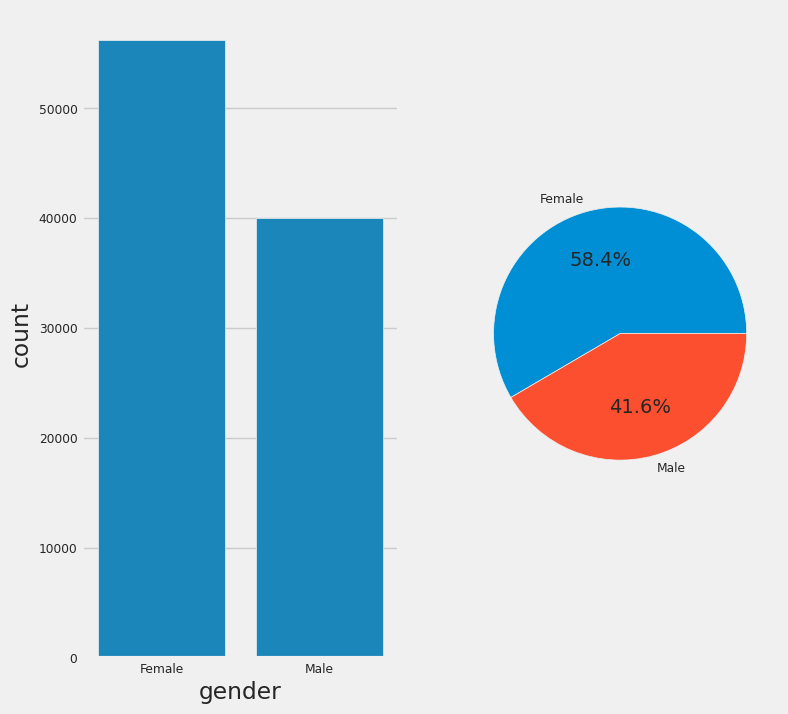

In [ ]:
# gender categorical data
# Remove Unneccessary value
df = df[df['gender'] != 'Other']

labels = ['Female', 'Male']
values = df['gender'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
sns.countplot(x=df['gender'], data=df)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('FirstImage')
plt.show()

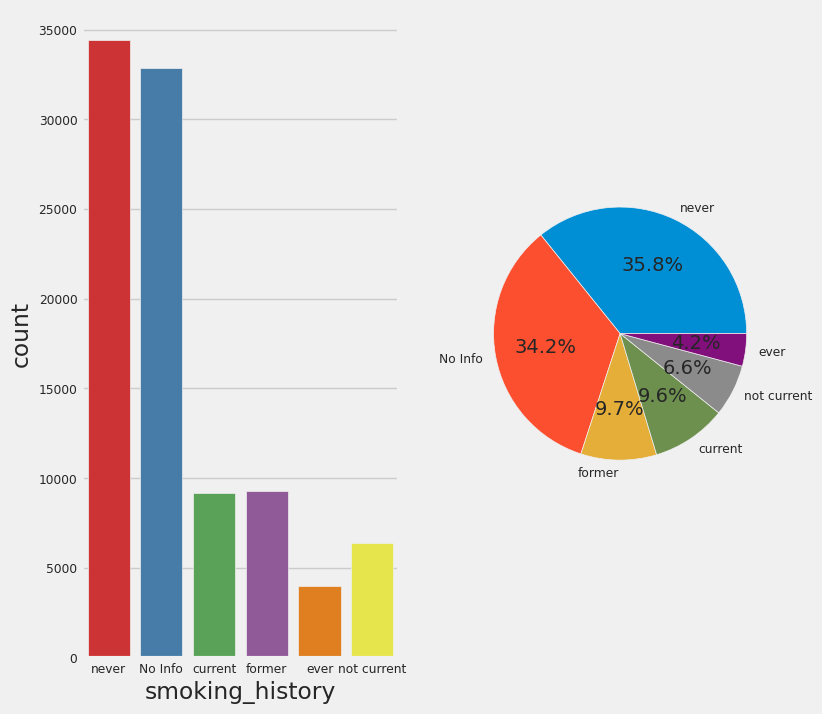

In [ ]:
# smoking history categorical data
labels = ['never', 'No Info', 'former', 'current', 'not current', 'ever']
values = df['smoking_history'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
sns.countplot(x=df['smoking_history'], data=df, palette = "Set1")
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('Image')
plt.show()

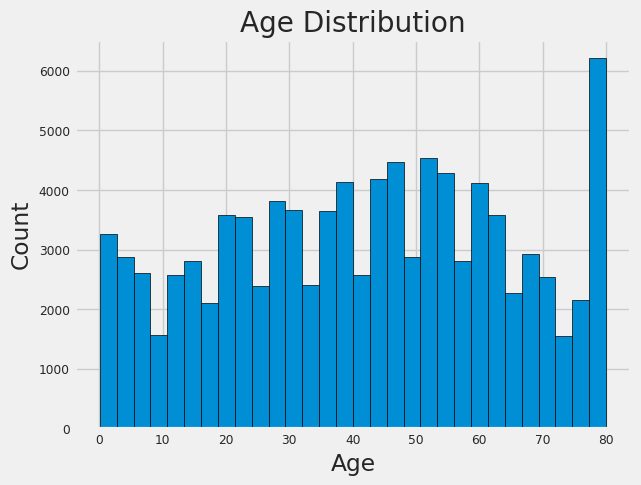

In [ ]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

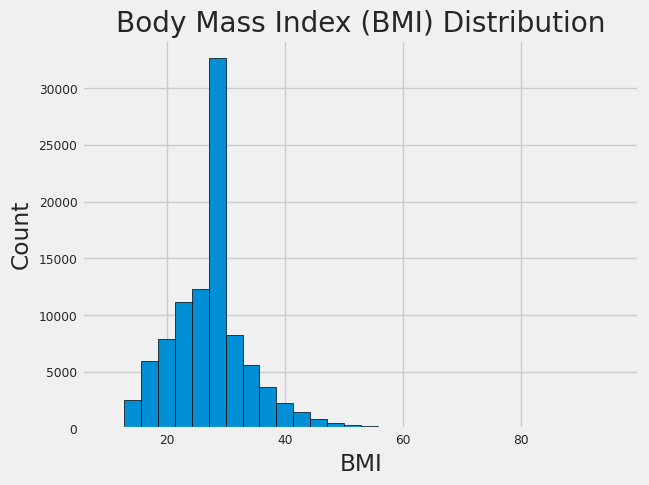

In [ ]:
# Histogram for bmi
plt.hist(df['bmi'], bins=30, edgecolor='black')
plt.title('Body Mass Index (BMI) Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

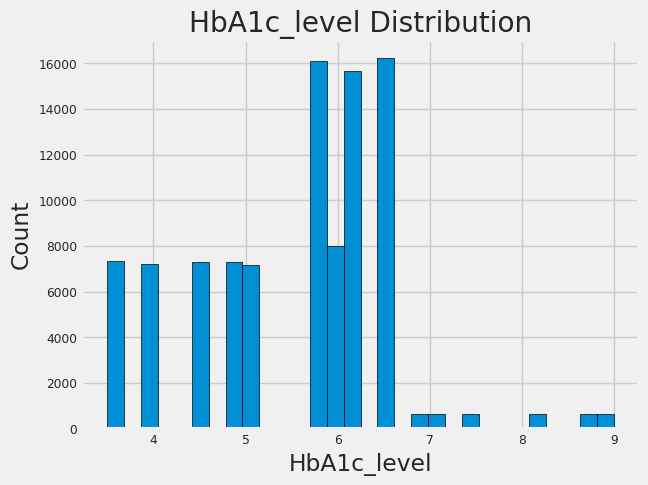

In [ ]:
# Histogram for HbA1c level
plt.hist(df['HbA1c_level'], bins=30, edgecolor='black')
plt.title('HbA1c_level Distribution')
plt.xlabel('HbA1c_level')
plt.ylabel('Count')
plt.show()

In [ ]:
# Create a donut chart to visualize the frequency of outcomes in the dataset
import plotly.express as px
diabetes_freq = df['diabetes'].value_counts()
diabetes_freq.index = ['No Diabetes', 'Diabetes']  # replace 0 and 1 with text labels
colors = ['#488A99', '#DADADA']
fig = px.pie(diabetes_freq, values=diabetes_freq.values, names=diabetes_freq.index,
             hole=0.7, color=diabetes_freq.index, color_discrete_sequence=colors)
fig.update_layout(title='Most people are not affected by diabetes.',
                  plot_bgcolor='#FFFFFF',
                  paper_bgcolor='#FFFFFF',
                  font_color='#333333',
                  title_font_size=24,
                  autosize=False,
                  width=600,
                  height=600)
fig.update_traces(texttemplate='%{percent:.1%}', textposition='inside')
fig.show()

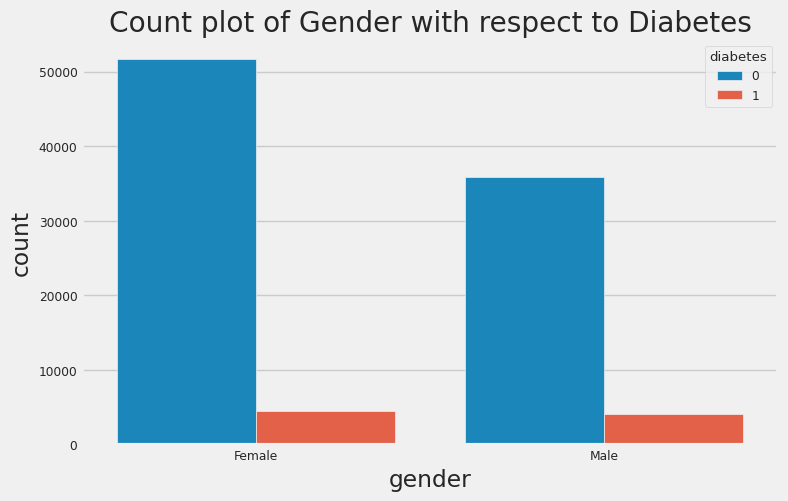

In [ ]:
# Count plot of Gender with respect to Diabetes
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title(f'Count plot of Gender with respect to Diabetes')
plt.show()

## Data preparation

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'smoking_history' column
df['smoking_history'] = lab.fit_transform(df['smoking_history'])

#perform label encoding on 'gender' column
df['gender'] = lab.fit_transform(df['gender'])

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


## Correlation Matrix using Heat map


***Feature Selection Method: Correlation Matrix with Heatmap***


**Pearson's Correlation Coefficient** : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information. The variables plotted on each axis can be of any type, whether they take on categorical labels or numeric values.

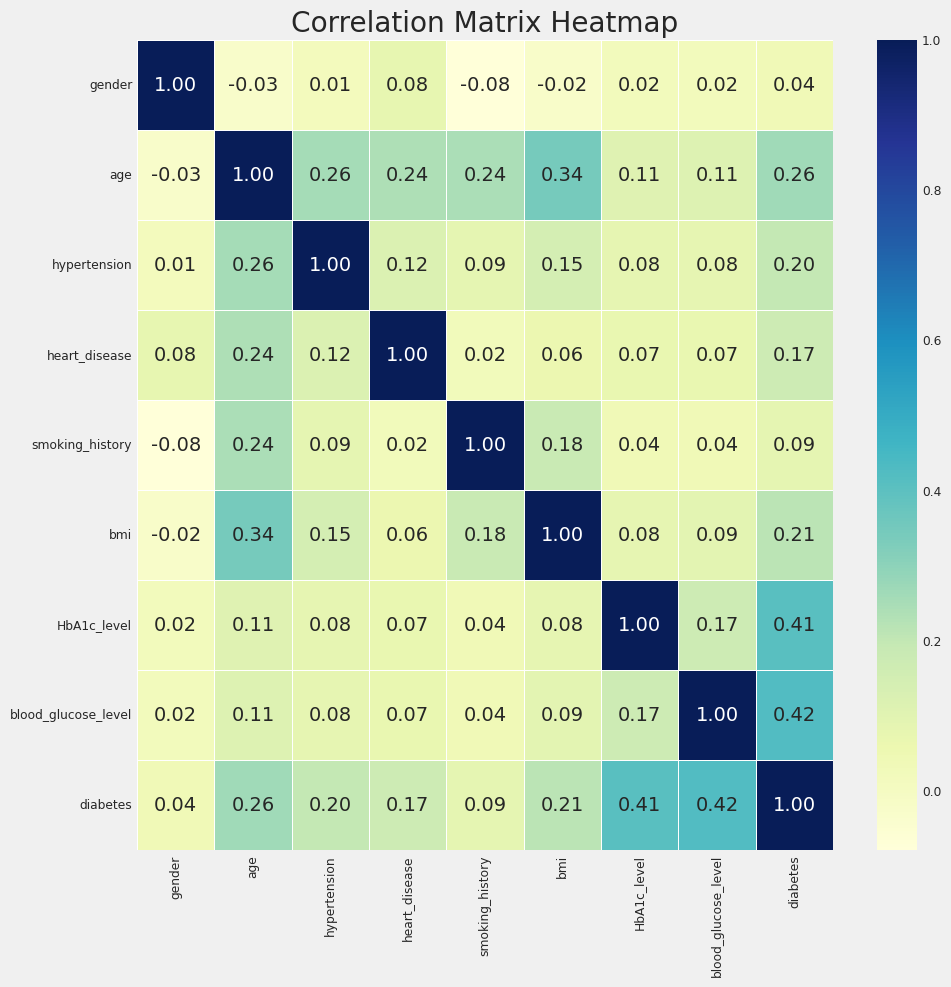

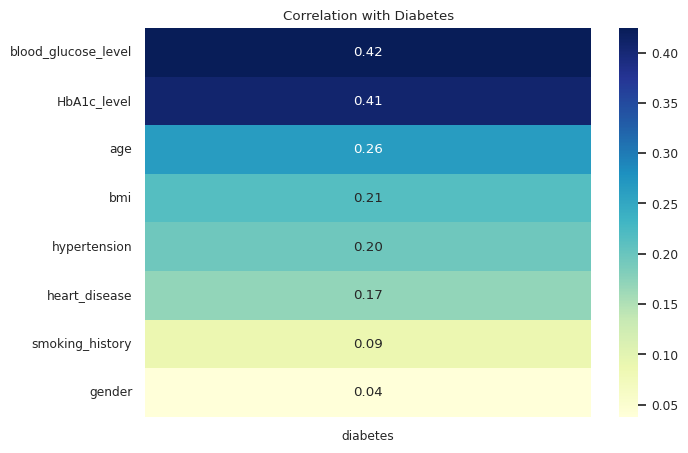

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()
#Graph I.
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

CONCLUSION :- Observe the last row 'diabetes' and note its correlation scores with different features. We can observe that HbA1c level, blood glucose level, hypertension, heart disease, bmi and age are the most correlated with Diabetes.

**HbA1c level and Blood Glucose level are the best indicators of diabetes outcome in this situation.**

It is seen that with strongly correlated features, the target class can be predicted more easily, and more meaningful results can be drawn.

 **Class Imbalance**

From the EDA ,the dataset is imbalanced (with 9% positive cases for diabetes and 91% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

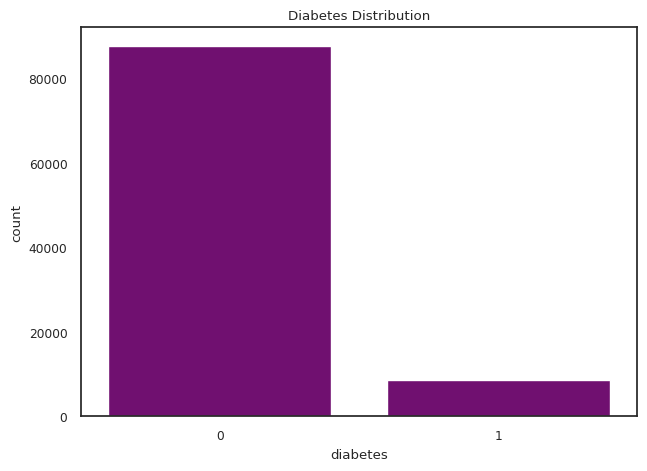

In [ ]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df, color = "purple")
plt.title('Diabetes Distribution')
plt.show()



```
#Quantile Transformer or Robust Scaler
from sklearn.preprocessing import QuantileTransformer
quantile  = QuantileTransformer()
dfq = df.drop(['diabetes', 'hypertension', 'heart_disease','gender', 'smoking_history'],axis='columns')
dfnew = quantile.fit_transform(dfq)
dfnew = pd.DataFrame(dfq)
dfnew.columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
dfnew.head()
```



Why is Data Scaling Important?

In machine learning, we often deal with datasets where different features can be measured on different scales. This discrepancy can cause a skew in the analysis, which is particularly troublesome for algorithms that use Euclidean distance or those sensitive to feature magnitudes, like SVMs and KNNs. Enter data scaling: a method to normalize the range of independent variables or features of data.



Outliers in the '**blood glucose level**' field are plausible in real-life datasets. Outliers in '**BMI**' and '**HbA1c levels**' in a diabetes prediction dataset are realistic and can reflect true variations in the population. They can represent true physiological differences, medical conditions, or situational factors like stress and medication effects. However, outliers might also result from data entry or measurement errors, so it’s important to investigate their origins before deciding how to handle them in your analysis.

Tree-based models (**Decision Trees, Random Forest, XGBoost**) generally don’t require scaling, even with outliers.
For linear models (**Logistic Regression**, SVM, k-NN), scaling is recommended, and it’s important to consider the impact of outliers. If outliers are present, you might want to handle them first or use a robust scaling technique to minimize their impact.

## Splitting the data into training data and testing data

In [ ]:
x = df.drop(['diabetes'], axis=1)
y = df['diabetes']

In [ ]:
x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

## Resolving Class Imbalance in Target Variable

In [ ]:
!pip install imblearn

In [ ]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_resample(x, y)

print("Before OverSampling, counts of label '1' in y: {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0' in y: {} \n".format(sum(y == 0)))

print('After OverSampling, the shape of x: {}'.format(x_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1' in y: {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0' in y: {}".format(sum(y_res == 0)))

Before OverSampling, counts of label '1' in y: 8482
Before OverSampling, counts of label '0' in y: 87646 

After OverSampling, the shape of x: (175292, 8)
After OverSampling, the shape of y: (175292,) 

After OverSampling, counts of label '1' in y: 87646
After OverSampling, counts of label '0' in y: 87646


SMOTE over-sampling:
diabetes
0    87646
1    87646
Name: count, dtype: int64


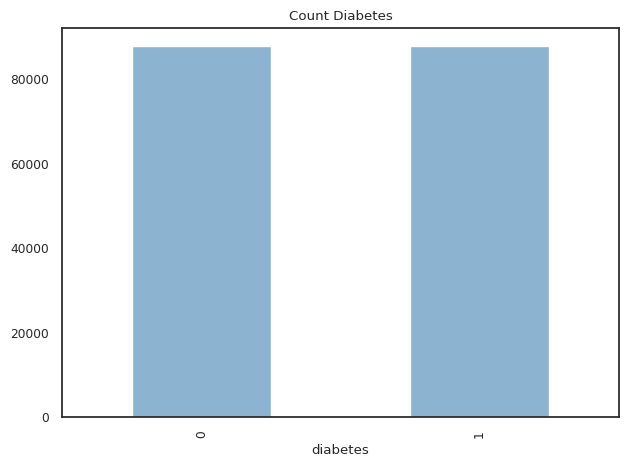

In [ ]:
df_smote_over = pd.DataFrame(y_res, columns=['diabetes'])

print('SMOTE over-sampling:')
print(df_smote_over.diabetes.value_counts())

df_smote_over.diabetes.value_counts().plot(kind='bar', title='Count Diabetes');

## TRAIN TEST SPLIT

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

Train Dataset are used to fit the machine learning model.Test Dataset are used to evaluate the fit machine learning model.

Split percentages: Train: 70%, Test: 30%

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_res, test_size=0.3, random_state=42)

## Model Preparation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc, log_loss

## 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000,random_state=42)
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
lrscore = lr.score(x_test,y_test)

In [ ]:
y_pred_proba = lr.predict_proba(x_test)[:, 1]
[fpr1, tpr1, thr1] = roc_curve(y_test, y_pred_proba)
# fpr - false positive rate, tpr - true positive rate, thr - threshold
print('Train/Test split results:\n')
print(lr.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred1))
print(lr.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(lr.__class__.__name__+" auc is %2.3f" % auc(fpr1, tpr1))

Train/Test split results:

LogisticRegression basic accuracy is 0.884
LogisticRegression log_loss is 0.251
LogisticRegression auc is 0.959


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     26266
           1       0.43      0.87      0.57      2573

    accuracy                           0.88     28839
   macro avg       0.71      0.88      0.75     28839
weighted avg       0.94      0.88      0.90     28839



## 2) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(x_test)
rfscore = rf.score(x_test,y_test)

In [ ]:
from sklearn import metrics
print("Random Forest accuracy: ", metrics.accuracy_score(y_test, y_pred2))

Random Forest accuracy:  0.9674746003675578


In [ ]:
y_pred_proba_rf = rf.predict_proba(x_test)[:, 1]
[fpr2, tpr2, thr2] = roc_curve(y_test, y_pred_proba_rf)
# fpr - false positive rate, tpr - true positive rate, thr - threshold
print('Train/Test split results:\n')
print(rf.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred2))
print(rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_rf))
print(rf.__class__.__name__+" auc is %2.3f" % auc(fpr2, tpr2))

Train/Test split results:

RandomForestClassifier basic accuracy is 0.967
RandomForestClassifier log_loss is 0.160
RandomForestClassifier auc is 0.960


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26266
           1       0.94      0.68      0.79      2573

    accuracy                           0.97     28839
   macro avg       0.96      0.84      0.89     28839
weighted avg       0.97      0.97      0.97     28839



## 3) XGBoost Classifier

In [ ]:
# Import XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from pandas import MultiIndex, Int16Dtype
# Initialize XGBoost model
xgb = XGBClassifier()
# train the model
xgb.fit(x_train, y_train)
# predict on test split
y_pred3 = xgb.predict(x_test)
XGBscore = xgb.score(x_test,y_test)

In [ ]:
y_pred_proba_xgb = xgb.predict_proba(x_test)[:, 1]
[fpr3, tpr3, thr3] = roc_curve(y_test, y_pred_proba_xgb)
# fpr - false positive rate, tpr - true positive rate, thr - threshold
print('Train/Test split result:\n')
print(xgb.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred3))
print(xgb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_xgb))
print(xgb.__class__.__name__+" auc is %2.3f" % auc(fpr3, tpr3))

Train/Test split result:

XGBClassifier basic accuracy is 0.969
XGBClassifier log_loss is 0.088
XGBClassifier auc is 0.976


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26266
           1       0.96      0.68      0.80      2573

    accuracy                           0.97     28839
   macro avg       0.96      0.84      0.89     28839
weighted avg       0.97      0.97      0.97     28839



## 4) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
y_pred4 = dt.predict(x_test)
dtscore = dt.score(x_test,y_test)

In [ ]:
y_pred_proba_tree = dt.predict_proba(x_test)[:, 1]
[fpr4, tpr4, thr4] = roc_curve(y_test, y_pred_proba_tree)
# fpr - false positive rate, tpr - true positive rate, thr - threshold
print('Train/Test split results:\n')
print(dt.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred4))
print(dt.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_tree))
print(dt.__class__.__name__+" auc is %2.3f" % auc(fpr4, tpr4))

Train/Test split results:

DecisionTreeClassifier basic accuracy is 0.946
DecisionTreeClassifier log_loss is 1.957
DecisionTreeClassifier auc is 0.850


In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26266
           1       0.68      0.73      0.71      2573

    accuracy                           0.95     28839
   macro avg       0.83      0.85      0.84     28839
weighted avg       0.95      0.95      0.95     28839



## Algorithm Analysis

In [ ]:
from sklearn import ensemble, linear_model, tree
from sklearn import model_selection, tree, linear_model, ensemble

Model = [lr, dt, rf, xgb] #lr-Logistic Regression,rf-Random Forest Classifier, xgb-XGBoost Classifier

In [ ]:
from sklearn.metrics import f1_score
# Creating table of algorithm stats

Model_columns = []
Model_compare = pd.DataFrame(columns = Model_columns)

row_index = 0
for alg in Model:
  predicted = alg.fit(x_train, y_train).predict(x_test)
  [fp,tp, th] = roc_curve(y_test, alg.predict_proba(x_test)[:,1])
  Model_name = alg.__class__.__name__
  Model_compare.loc[row_index, 'Model Name'] = Model_name
  Model_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 3)
  Model_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted), 3)
  Model_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted), 3)
  Model_compare.loc[row_index, 'F1-score'] = round(f1_score(y_test, predicted), 3)
  Model_compare.loc[row_index, 'Area Under ROC Curve'] = round(auc(fp,tp), 3)

  row_index+=1

Model_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
Model_compare

,Model Name,Test Accuracy,Precision,Recall,F1-score,Area Under ROC Curve
3,XGBClassifier,0.969,0.957,0.684,0.798,0.976
2,RandomForestClassifier,0.967,0.939,0.674,0.785,0.961
1,DecisionTreeClassifier,0.946,0.682,0.734,0.707,0.850
0,LogisticRegression,0.884,0.426,0.871,0.572,0.959


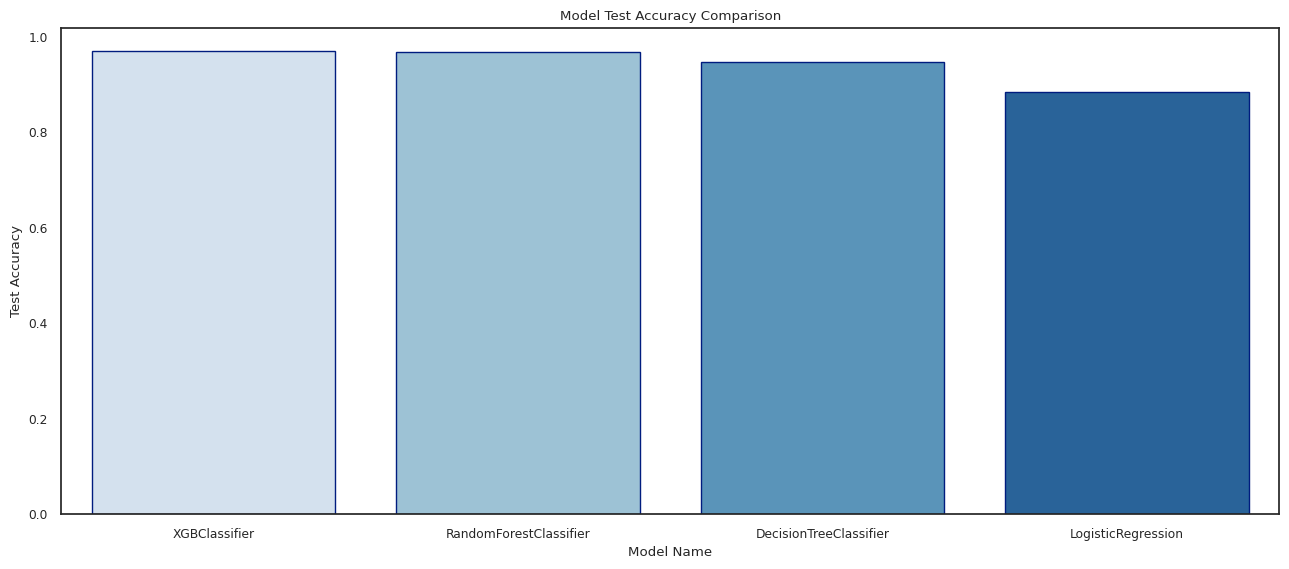

In [ ]:
# Model Test Accuracy Comparison

plt.subplots(figsize=(14,6))
sns.barplot(x="Model Name", y="Test Accuracy", data=Model_compare,palette='Blues',edgecolor=sns.color_palette('dark', 7))
plt.xticks()
plt.title('Model Test Accuracy Comparison')
plt.show()

**Since XGBoost model has the highest accuracy rate of 97%, it is chosen for deployment.**

## Prediction

Inputs Allowed:

Gender - Male / Female / Other

Hypertension - Enter either 0 or 1, where 0 is Yes and 1 is No

Heart Disease - Enter either 0 or 1

Smoking History - No Info / never / current / ever / former / not current

In [ ]:
print("Expected feature names:", xgb.get_booster().feature_names)

Expected feature names: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [ ]:
# Make predictions on new data
# Converting Dictionary into dataframe
new_data = pd.DataFrame({'gender': ['Female'], 'age': [67], 'hypertension': [0], 'heart_disease': [0], 'smoking_history': ['never'], 'bmi': [25.69], 'HbA1c_level': [4.8], 'blood_glucose_level': [200]})
new_data['smoking_history'] = new_data['smoking_history'].astype('category')
new_data['gender'] = new_data['gender'].astype('category')
prediction = xgb.predict(new_data)
print("T2D Prediction:", prediction)
if prediction == 1:
  print("You Have Type 2 Diabetes" )
else:
  print("No, You Don't Have Type 2 Diabetes")

T2D Prediction: [0]
No, You Don't Have Type 2 Diabetes


In [ ]:
# Make predictions on new data
new_data = pd.DataFrame({'gender': ['Male'], 'age': [67], 'hypertension': [0], 'heart_disease': [1], 'smoking_history': ['not current'], 'bmi': [27.32], 'HbA1c_level': [7.5], 'blood_glucose_level': [200]})
new_data['smoking_history'] = new_data['smoking_history'].astype('category')
new_data['gender'] = new_data['gender'].astype('category')
prediction = xgb.predict(new_data)
print("T2D Prediction:", prediction)
if prediction == 1:
  print("You Have Type 2 Diabetes" )
else:
  print("No, You Don't Have Type 2 Diabetes")

T2D Prediction: [1]
You Have Type 2 Diabetes


Diagnostic Tests:

For an HbA1c test to classify as normal, or in the non-diabetic range, the value must be below 5.7 %.

Anyone with an HbA1c value of 5.7 % to 6.4 % is considered to be prediabetic, while diabetes can be diagnosed with a HbA1c of 6.5% or higher.



```
hbA1c = new_data['HbA1c_level'] #Convert df to numpy

if hbA1c >= 5.7:
  print("You Have Prediabetes")
else:
  print("No, You Don't Have Prediabetes")
```



**Gradio interface is used for GUI development, to deploy the XGB model.**

During model deployment, the above if-else condition is added to existing XGB model to increase its efficiency. Now, the model is able to predict **Prediabetes** along with **T2D**.

## Confusion Matrix

* A confusion matrix is a table that is used to define the performance of a classification algorithm.
* It visualizes and summarizes the performance of a classification algorithm.

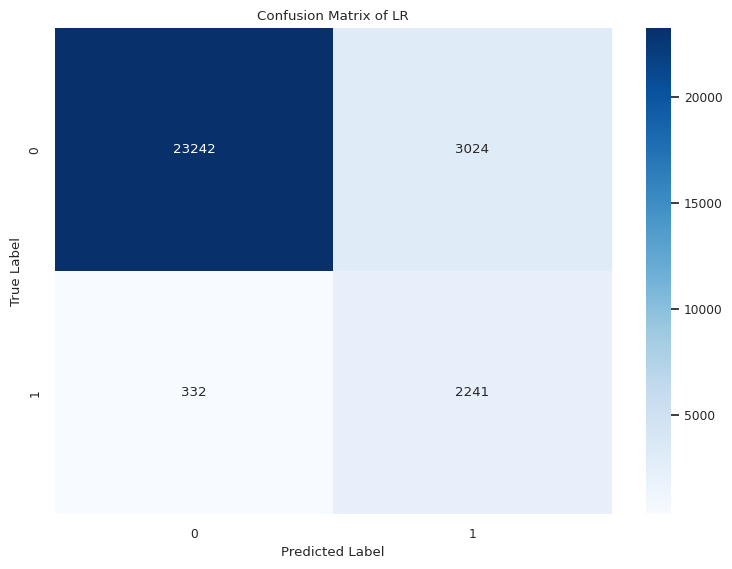

In [ ]:
# Confusion Matrix of LR
from sklearn.metrics import confusion_matrix

# y_pred1 = lr.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of LR')
plt.show()

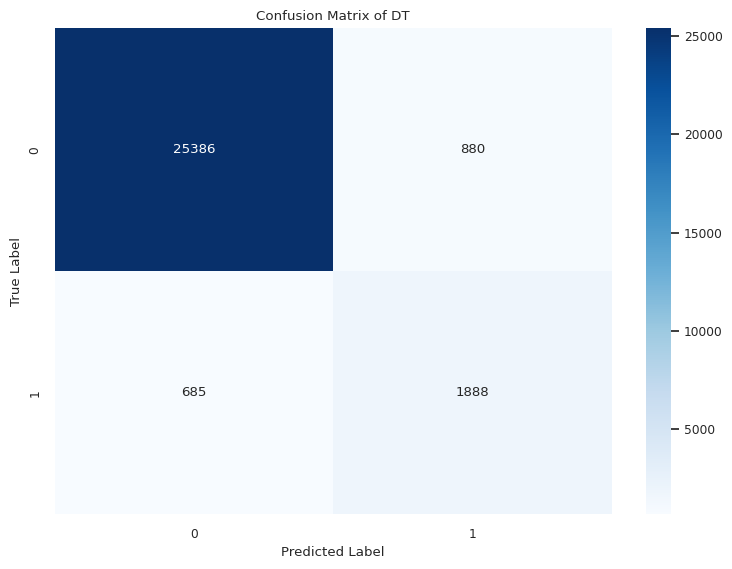

In [ ]:
# Confusion Matrix of DT
conf_matrix = confusion_matrix(y_test, y_pred4)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of DT')
plt.show()

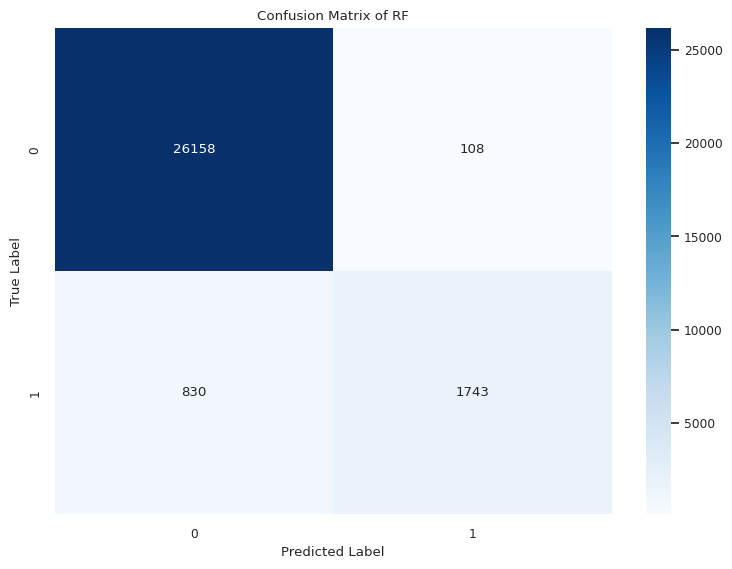

In [ ]:
# Confusion Matrix of RF
# y_pred2 = rf.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of RF')
plt.show()

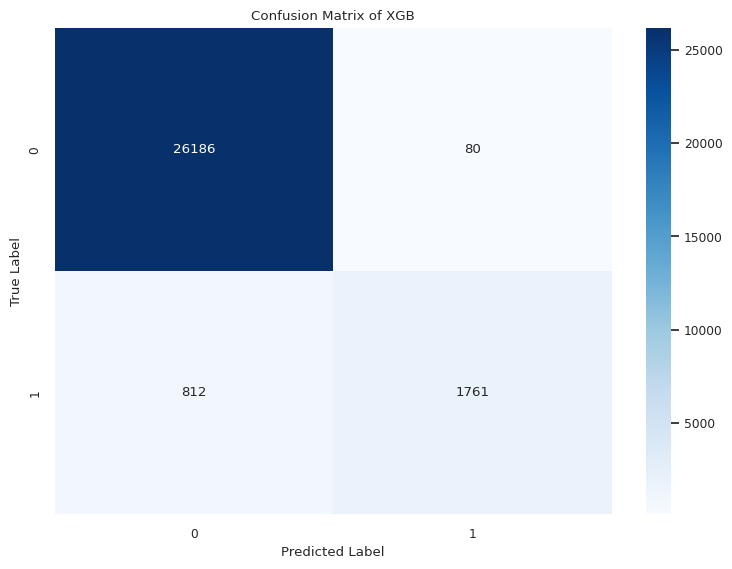

In [ ]:
# Confusion Matrix of XGB
# y_pred3 = xgb.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGB')
plt.show()

## ROC Curve

ROC AUC stands for Receiver Operating Characteristic Area Under the Curve.

ROC AUC score is a single number that summarizes the classifier's performance across all possible classification thresholds. To get the score, you must measure the area under the ROC curve.

ROC AUC score shows how well the classifier distinguishes positive and negative classes. It can take values from 0 to 1.

A higher ROC AUC indicates better performance. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5.

In [ ]:
from sklearn.metrics import roc_curve, auc

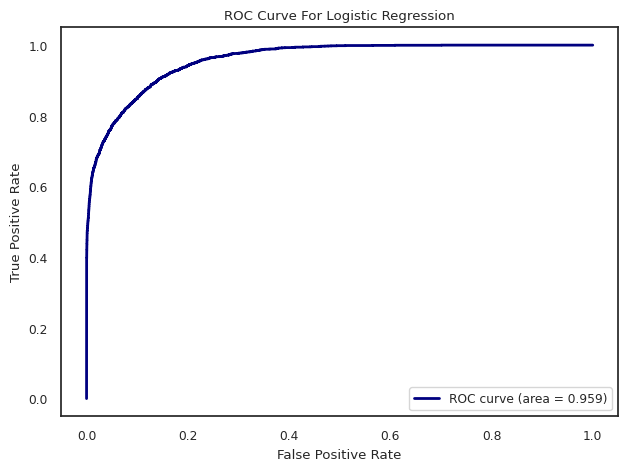

In [ ]:
# Plot ROC curve For Logistic Regression
plt.figure()
plt.plot(fpr1, tpr1, color='navy', lw=2, label='ROC curve (area = %2.3f)' % auc(fpr1, tpr1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Logistic Regression')
plt.legend(loc="lower right")
plt.show()

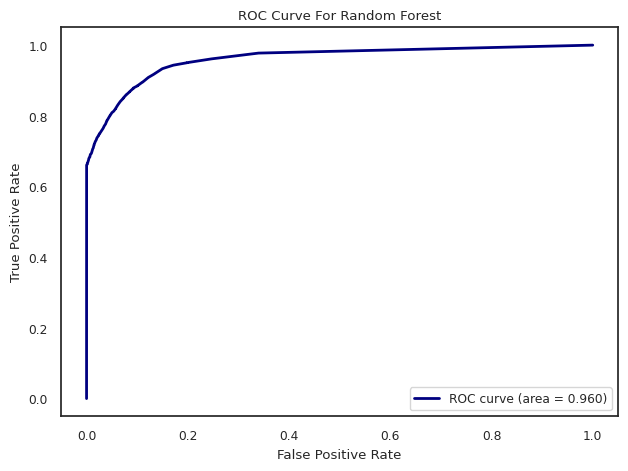

In [ ]:
# Plot ROC curve For Random Forest
plt.figure()
plt.plot(fpr2, tpr2, color='navy', lw=2, label='ROC curve (area = %2.3f)' % auc(fpr2, tpr2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Random Forest')
plt.legend(loc="lower right")
plt.show()

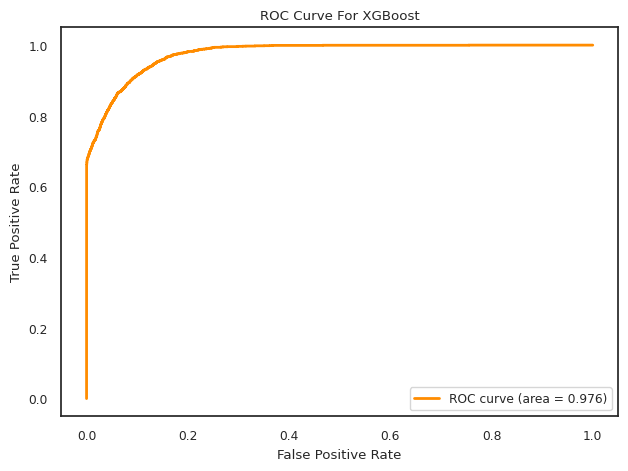

In [ ]:
# Plot ROC curve For XGBoost
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (area = %2.3f)' % auc(fpr3, tpr3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For XGBoost')
plt.legend(loc="lower right")
plt.show()

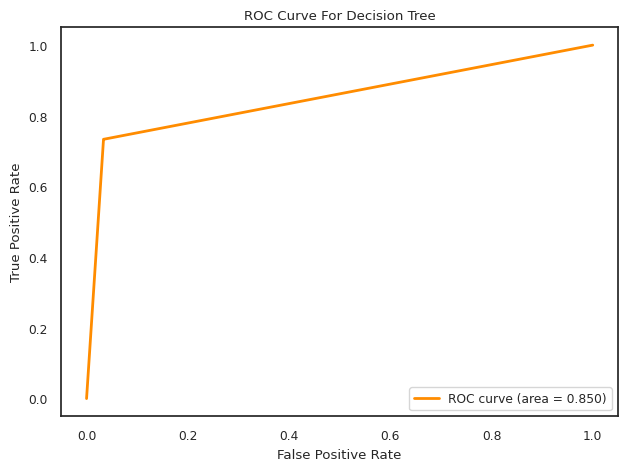

In [ ]:
# Plot ROC curve For Decision Tree
plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label='ROC curve (area = %2.3f)' % auc(fpr4, tpr4))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Decision Tree')
plt.legend(loc="lower right")
plt.show()

## K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

### For LR

In [ ]:
scorelr = cross_val_score(lr,x,y,cv=10)

In [ ]:
scorelr

array([0.8891085 , 0.89077291, 0.88213877, 0.88994071, 0.88692396,
       0.88806824, 0.87912202, 0.88681993, 0.88795256, 0.87931752])

In [ ]:
scorelr.mean()

0.886016511703725

### For RF

In [ ]:
scorerf = cross_val_score(rf,x,y,cv=10)

In [ ]:
scorerf

array([0.96764798, 0.96920836, 0.96962447, 0.96920836, 0.96660772,
       0.96702382, 0.97024862, 0.96764798, 0.96837287, 0.96962131])

In [ ]:
scorerf.mean()

0.9685211483842083

### For XGB

In [ ]:
scorexgb = cross_val_score(xgb,x,y,cv=10)

In [ ]:
scorexgb

array([0.97004057, 0.97076875, 0.97160096, 0.96972849, 0.96900031,
       0.96764798, 0.97128888, 0.97024862, 0.96889305, 0.97138993])

In [ ]:
scorexgb.mean()

0.9700607540099824

### For DT

In [ ]:
scoredt = cross_val_score(dt,x,y,cv=10)

In [ ]:
scoredt

array([0.94902736, 0.95266826, 0.94809113, 0.95235618, 0.94861126,
       0.94975554, 0.94985957, 0.9512119 , 0.95058261, 0.95047857])

In [ ]:
scoredt.mean()

0.9502642365668732